In [1]:
import pandas as pd
from pathlib import Path
path = Path('train-00000-of-00019.parquet')
df = pd.read_parquet(str(path))
df.head()

,conversation_hash,model,timestamp,conversation,turn,language,openai_moderation,detoxify_moderation,toxic,redacted,state,country,hashed_ip,header
0,698e02bae74e1ca4e941281cbe8ff6c7,gpt-4-0314,2023-04-09 00:01:06,[{'content': 'POUVEZ VOUS ME FAIRE UN PROJET D...,1,French,"[{'categories': {'harassment': False, 'harassm...","[{'identity_attack': 0.012024486437439919, 'in...",True,False,Dakar,Senegal,cc4eb1e4234c16afc7f5e3e144ad68387b201449cce400...,"{'accept-language': 'fr,fr-FR;q=0.9,en;q=0.8,e..."
1,c9ec5b440fbdd2a269333dd241f32f64,gpt-4-0314,2023-04-09 00:02:53,[{'content': 'Hey there! Are you familiar with...,1,English,"[{'categories': {'harassment': False, 'harassm...","[{'identity_attack': 0.00020589135237969458, '...",False,False,Texas,United States,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,"{'accept-language': 'en-US,en;q=0.9,es;q=0.8',..."
2,34f1581760df304d539e2fe4653b40d3,gpt-4-0314,2023-04-09 00:03:20,[{'content': 'Crea una imagen de una mujer cor...,2,Spanish,"[{'categories': {'harassment': False, 'harassm...","[{'identity_attack': 0.007170863449573517, 'in...",False,False,A Coruña,Spain,58369722cd0bdf7fc027a67491ba65b74576df6994c36c...,"{'accept-language': 'es-ES,es;q=0.9,en;q=0.8',..."
3,cf1267ca6b2f6fccc9c36652a00059a1,gpt-4-0314,2023-04-09 00:04:52,"[{'content': 'Old age PT hx of DM, HTN, dyslip...",1,English,"[{'categories': {'harassment': False, 'harassm...","[{'identity_attack': 0.0002258022577734664, 'i...",False,False,Mecca Region,Saudi Arabia,8133108d1c433c180c6be8302dc5a6681f2bec980190a1...,"{'accept-language': 'en-US,en;q=0.9', 'user-ag..."
4,72b6aa90f180f51aa1301b42484c9196,gpt-4-0314,2023-04-09 00:06:12,[{'content': 'I want you to act as a contempor...,1,English,"[{'categories': {'harassment': False, 'harassm...","[{'identity_attack': 0.0004189222236163914, 'i...",True,False,Kyiv City,Ukraine,f15615c379253246897d474e8d422f2e3e0615b9d6f085...,"{'accept-language': 'ru-UA,ru;q=0.9', 'user-ag..."


# Basic Stats about the dataset

In [2]:
n_chats = df.shape[0]
data_range = max(df['timestamp'])-min(df['timestamp'])
print(f'Number of conversations: {n_chats}',f'Over {data_range}')

Number of conversations: 54726 Over 19 days 08:54:58


# Choose a couple random conversations

In [3]:
from random import sample
n_samples = 2
samples = sample(range(n_chats),k=n_samples)

# Explore structure of dataset

In [4]:
conversations = df.iloc[samples[0]]
conversations

conversation_hash                       ed868a6b8eae6c920430df65e092fcd4
model                                                 gpt-3.5-turbo-0301
timestamp                                            2023-04-26 18:01:03
conversation           [{'content': 'اكتب مقال عن أضرار المياه الغازي...
turn                                                                   1
language                                                          Arabic
openai_moderation      [{'categories': {'harassment': False, 'harassm...
detoxify_moderation    [{'identity_attack': 0.005661848932504654, 'in...
toxic                                                              False
redacted                                                           False
state                                                               None
country                                                            Egypt
hashed_ip              6a2d65767ad45e86f6f03bf8da56067a3c6142c93585a6...
header                 {'accept-language': 'en-US,e

In [5]:
import numpy as np
np.unique(df['conversation_hash']).shape # if all hashes are distinct

(54319,)

In [6]:
f"Average conversation length {np.average([chat.shape[0] for chat in df['conversation']]):2f}"


'Average conversation length 6.400797'

In [7]:
f"Max conversation length {np.max([chat.shape[0] for chat in df['conversation']]):2f}"


'Max conversation length 114.000000'

In [8]:
f"Minimum conversation length {np.min([chat.shape[0] for chat in df['conversation']]):2f}"


'Minimum conversation length 2.000000'

In [9]:
f"Number of English Chats {df[df['language'] == 'English'].shape[0]}"


'Number of English Chats 27591'

In [10]:
countries = df['country'].dropna()
uniques = np.unique(countries).tolist()

txt = ""
with open('countries.txt','w') as f:
    for unique in uniques:
        txt += f"{unique}\n"
    f.write(txt)


### Explore Sub arrays in data

In [11]:
chat = conversations['conversation']
print(chat.shape)
print(chat[0])

(2,)
{'content': 'اكتب مقال عن أضرار المياه الغازية', 'country': 'Egypt', 'hashed_ip': '6a2d65767ad45e86f6f03bf8da56067a3c6142c93585a6379cd2925c78794523', 'header': {'accept-language': 'en-US,en;q=0.9,ar;q=0.8', 'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}, 'language': 'Arabic', 'redacted': False, 'role': 'user', 'state': None, 'timestamp': None, 'toxic': False, 'turn_identifier': 263972}


### moderation

In [12]:
openai_moderation = conversations['openai_moderation']
detoxify_moderation = conversations['detoxify_moderation']

print(openai_moderation)
print(detoxify_moderation)

[{'categories': {'harassment': False, 'harassment/threatening': False, 'harassment_threatening': False, 'hate': False, 'hate/threatening': False, 'hate_threatening': False, 'self-harm': False, 'self-harm/instructions': False, 'self-harm/intent': False, 'self_harm': False, 'self_harm_instructions': False, 'self_harm_intent': False, 'sexual': False, 'sexual/minors': False, 'sexual_minors': False, 'violence': False, 'violence/graphic': False, 'violence_graphic': False}, 'category_scores': {'harassment': 8.569063356844708e-05, 'harassment/threatening': 7.81137259764364e-06, 'harassment_threatening': 7.81137259764364e-06, 'hate': 3.722726250998676e-05, 'hate/threatening': 2.8934604756614135e-07, 'hate_threatening': 2.8934604756614135e-07, 'self-harm': 8.623626490589231e-05, 'self-harm/instructions': 5.724512448068708e-06, 'self-harm/intent': 3.0175119718478527e-06, 'self_harm': 8.623626490589231e-05, 'self_harm_instructions': 5.724512448068708e-06, 'self_harm_intent': 3.0175119718478527e-06

## Get highest location and time for usage

In [34]:

locations = df.groupby(['country','timestamp'])['turn'].sum()
locations.sort_values(ascending=False).head(5)


country    timestamp          
Italy      2023-04-16 16:54:09    57
Singapore  2023-04-10 06:43:10    55
Russia     2023-04-25 05:10:28    55
Canada     2023-04-26 14:08:15    50
France     2023-04-14 21:04:00    48
Name: turn, dtype: int64

## Day of the week usage

Text(0.5, 1.0, 'Daily Usage')

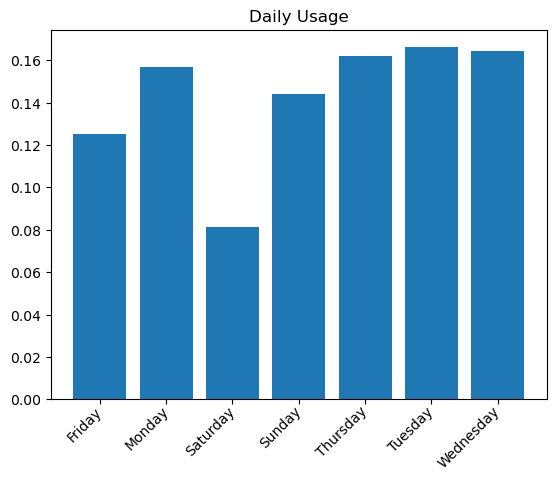

In [75]:
import matplotlib.pyplot as plt
from datetime import datetime
def get_day(index):
    return datetime.fromtimestamp(
    datetime.timestamp(
        df['timestamp'][index]
    )
).strftime('%A')

def get_hour(index):
    return datetime.fromtimestamp(
        datetime.timestamp(
            df['timestamp'][index]
        )
    ).strftime('%H')

days_of_week = df.groupby(get_day)['turn'].sum()
days_of_week 


fig, ax = plt.subplots()
ax.bar(days_of_week.index,days_of_week / df['turn'].sum())
plt.setp(ax.get_xticklabels(),rotation = 45,ha = 'right', va = 'center', rotation_mode = 'anchor')
plt.title("Daily Usage")


Text(0.5, 1.0, 'Worldwide usage by hour')

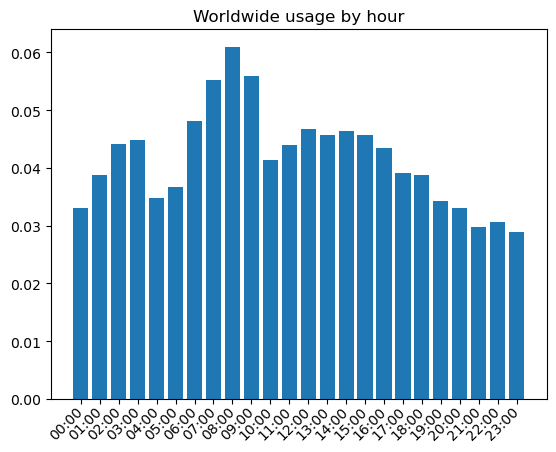

In [72]:
import matplotlib.pyplot as plt
hours = df.groupby(get_hour)['turn'].sum()
hours
fig, ax = plt.subplots()
ax.bar([f"{hour}:00" for hour in hours.index],hours / df['turn'].sum())
plt.setp(ax.get_xticklabels(),rotation = 45,ha = 'right', va = 'center', rotation_mode = 'anchor')
plt.title("Worldwide usage by hour")
